In [72]:
#### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

#### Getting the data
def read_data():
    try:
        data = pd.read_csv("C:/Data Science/Nov 2023/19 Nov 2023/Decision Tree Project - 8/Decision Tree  - Assignment -4/iphone_purchase_records.csv")
        return data
    except Exception as e:
        print("Data Path Not Found and Error is in the Read Data Function")

#### Calling the read data function
df = read_data()
# print(df.head())

#### Preprocessing and Feature Engineering
df1 = df.copy()
# print(df.head())
# print(df.info())
# print(df.shape)

# df1.isnull().sum()

# print(df1.describe())

# print(df1.describe(include = 'object'))

# print(df1.describe(include = 'number'))

# df1.select_dtypes(include='number').columns

# for i in ['Age', 'Salary', 'Purchase Iphone']:
#     sns.boxplot(data = df1,x = i)
#     plt.show()

# df1['Gender'].value_counts()

df1['Gender'] = df1['Gender'].replace(('Male','Female'),(1,0))

# for i in ['Age', 'Salary']:
#     sns.scatterplot(data = df1,x = i,y = 'Purchase Iphone',hue = 'Gender')
#     plt.show()

# sns.scatterplot(data = df1,x = 'Age',y = 'Salary',hue = 'Gender')

def data_prep(df1,t):
    X = df1[['Age', 'Salary',"Gender"]]
    y = df1['Purchase Iphone']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=365,stratify=y)
    return X_train,X_test,y_train,y_test

def ds_tree(X_train,y_train,X_test):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
    model_fit = model.fit(X_train,y_train)
    pred = model_fit.predict(X_test)
    return pred

def model_dec_tree_diag(y_test,pred):
    acc = accuracy_score(y_test,pred)
    return acc

def main_function():
    df1
    X_train,X_test,y_train,y_test = data_prep(df1,0.8)
    pred = ds_tree(X_train,y_train,X_test)
    acc = model_dec_tree_diag(y_test,pred)
    return acc

results = main_function()
print("The Accurancy Score is :",(round(results,2)*100),"%")

The Accurancy Score is : 90.0 %


In [73]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

<Axes: xlabel='Gender,Purchase Iphone'>

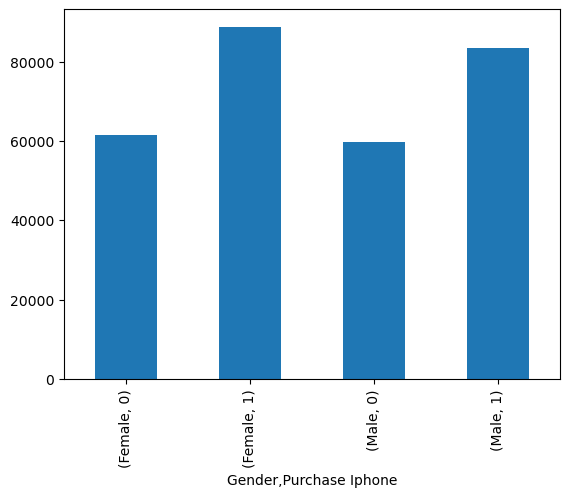

In [92]:
df.groupby(['Gender','Purchase Iphone'])['Salary'].mean().plot(kind = 'bar')

<Axes: xlabel='Age', ylabel='Salary'>

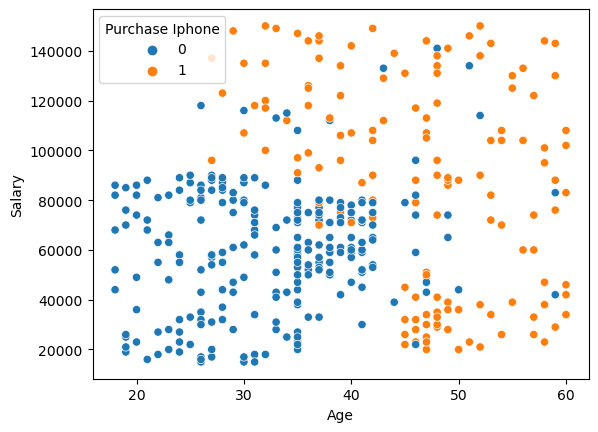

In [83]:
sns.scatterplot(data = df,x = 'Age',y = 'Salary',hue = 'Purchase Iphone')

<Axes: xlabel='Gender', ylabel='Salary'>

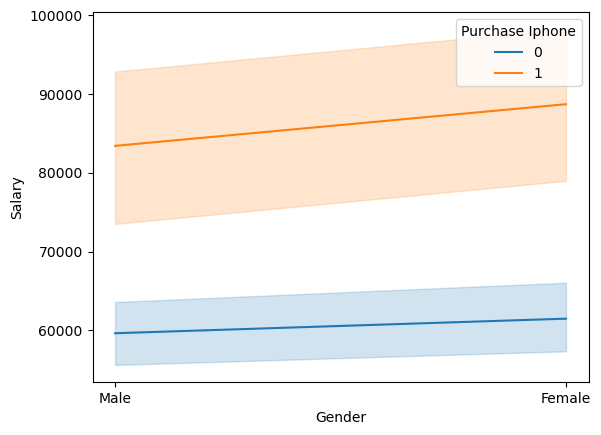

In [81]:
sns.lineplot(data = df,x = 'Gender',y = 'Salary',hue = 'Purchase Iphone')

<Axes: xlabel='Age', ylabel='Salary'>

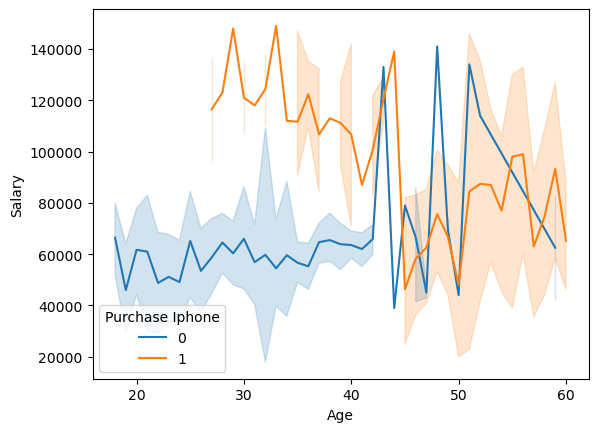

In [80]:
sns.lineplot(data = df,x = 'Age',y = 'Salary',hue = 'Purchase Iphone')

<Axes: xlabel='Gender', ylabel='Salary'>

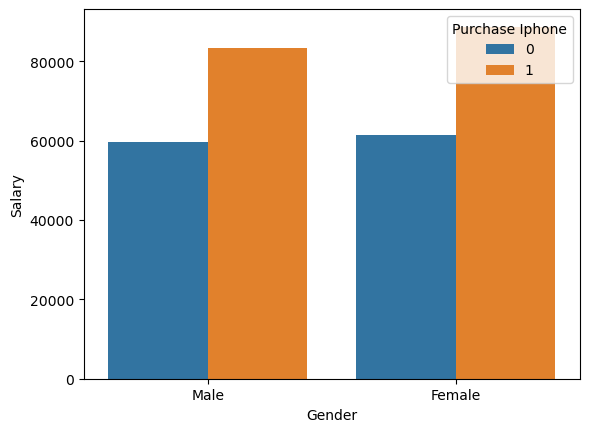

In [79]:
sns.barplot(data = df ,x ='Gender', y = 'Salary', hue = 'Purchase Iphone',errorbar=None)

<Axes: xlabel='Gender', ylabel='Age'>

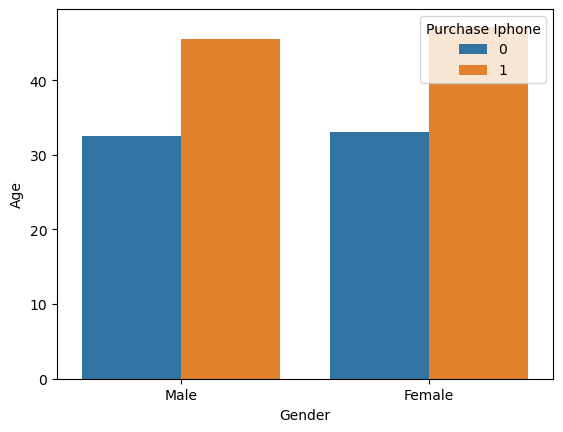

In [78]:
sns.barplot(data = df ,x ='Gender', y = 'Age', hue = 'Purchase Iphone',errorbar=None)

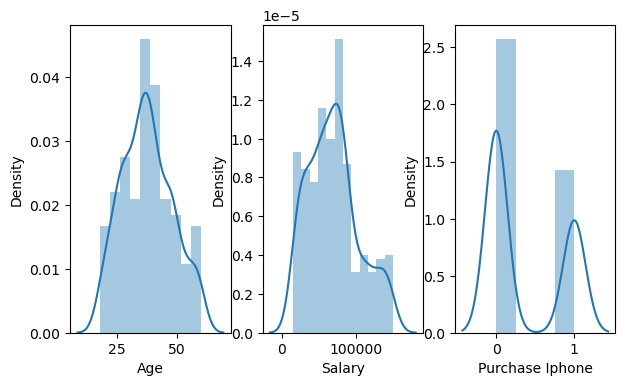

In [74]:
import warnings
warnings.filterwarnings('ignore')
cols = ['Age', 'Salary', 'Purchase Iphone']
plt.figure(figsize=(12,4))
for i,col in enumerate(cols,1): 
    plt.subplot(1,5,i)
    sns.distplot(df[col])

<Figure size 1200x300 with 0 Axes>

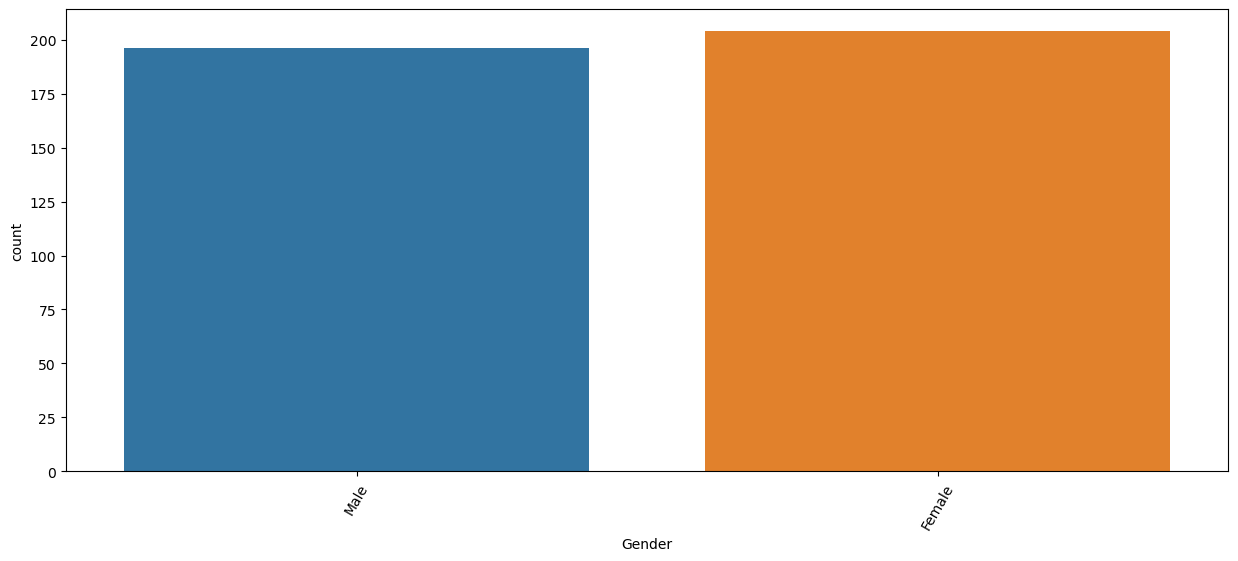

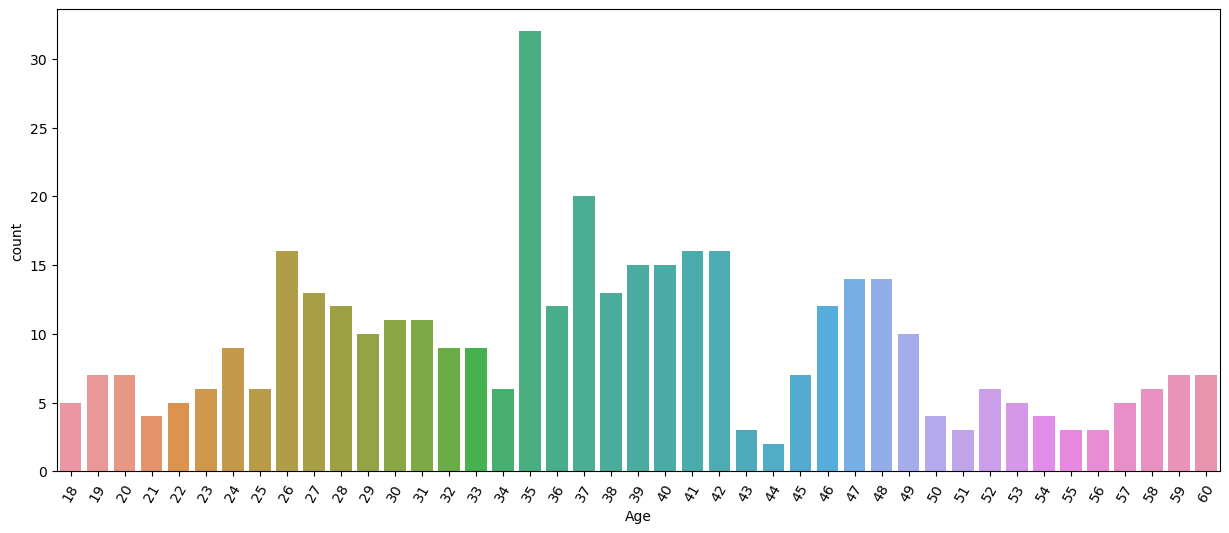

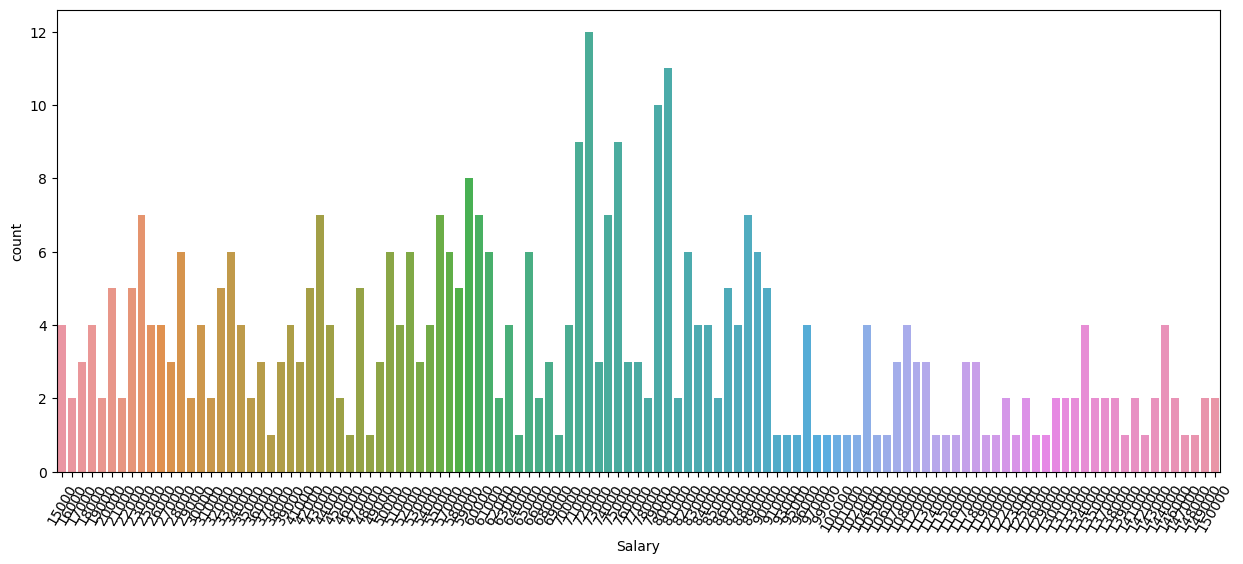

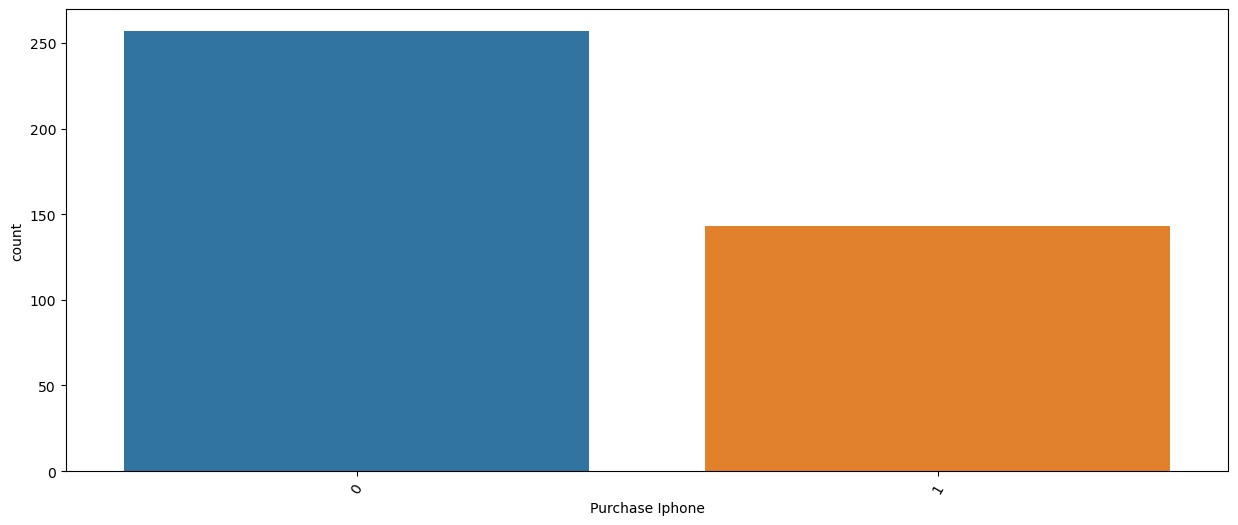

In [75]:
col = ['Gender', 'Age', 'Salary', 'Purchase Iphone']
plt.figure(figsize=(12,3))
for i in col :
    plt.figure(figsize=(15,6))
    sns.countplot(x = i , data = df)
    plt.xticks(rotation= 60)
    plt.show()